## Задание по библиотекам Pandas и Matplotlib
### Лабораторная работа № 3 по дисциплине "Технологии программирования"

Подключаем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Скачиваем датасет с информацией о пассажирах Титаника:

In [2]:
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
file_name = 'titanic.csv'

Проверяем наличие скачанного датасета:



In [3]:
urllib.request.urlretrieve(url, file_name)

('titanic.csv', <http.client.HTTPMessage at 0x27ad499d550>)

Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

In [4]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


__С использованием датафрейма нужно выполнить следующие задания__.

1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [5]:
mask = df.isnull()
print(mask.sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


2. В соответствии с вариантом, определите:

   1. Количество женщин старше 50 лет на борту.
   2. Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми.
   3. Число погибших детей в возрасте до 12 лет, путешествующих первым классом.
   4. Среднее значение коэффициента выживаемости десяти пассажиров третьего класса с самыми дорогими билетами.
   5. Среднее значение цены билета пассажиров, путешествующих без родственников.

In [6]:
passengers_third_class = df[df['Pclass'] == 3]
sorted_by_fare = passengers_third_class.sort_values(by=['Fare'], ascending = False).head(10)
rate_survived = sorted_by_fare['Survived'].mean()*100
print("Средний коэффициент выживаемости: ", rate_survived, "%")

Средний коэффициент выживаемости:  20.0 %


3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

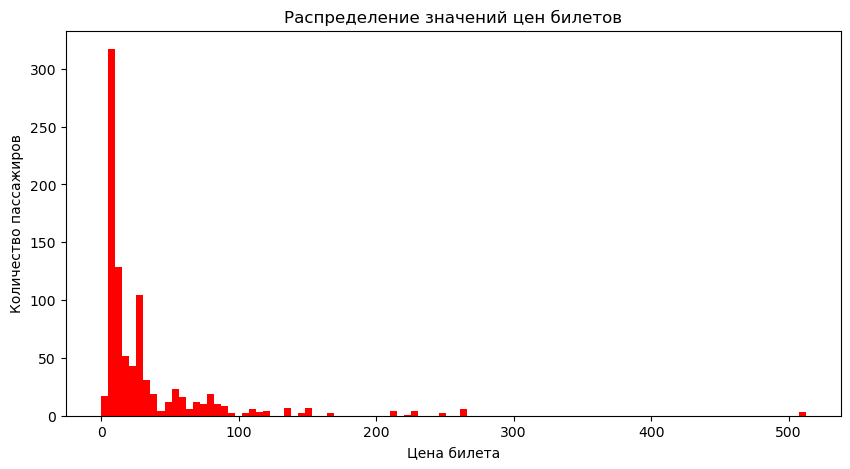

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(df['Fare'], bins=100, color='red')
plt.title('Распределение значений цен билетов')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')
plt.show()

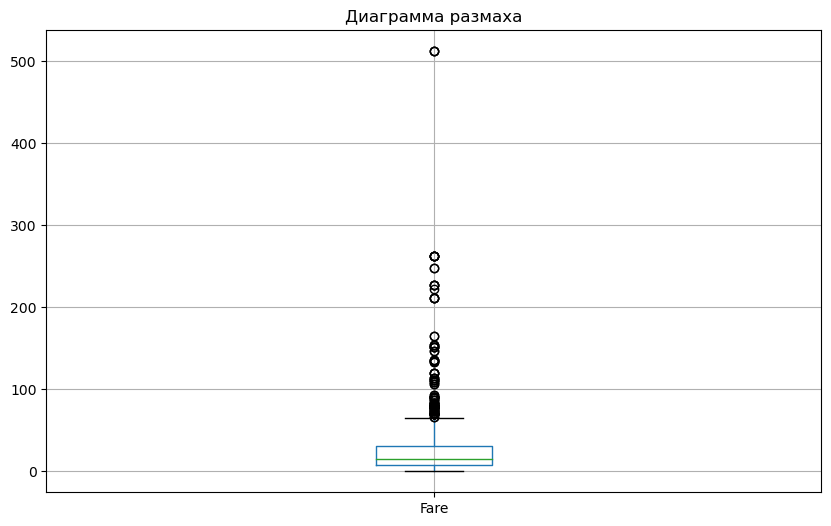

In [12]:
df.boxplot('Fare', figsize=(10, 6))
plt.title('Диаграмма размаха')
plt.show()

4. В соответствии с вариантом, определите, верны ли следующие утверждения. Приведите доказательства ответа.

  1. Чем дороже билет, тем выше вероятность выжить.
  2. Мужчинам в катастрофе выжить проще.
  3. Чем больше родственников у человека, тем выше шанс того, что он купит билет третьего класса.
  4. Если Вам больше 70 лет, то шансов выжить в катастрофе у Вас практически нет.
  5. Чем больше родственников у чаловека, тем выше его шанс погибнуть.

In [13]:
passengers_age_more_70 = df[df['Age'] > 70.99]

print(passengers_age_more_70.iloc[:,[0,4]])
print('\n')
df_survived = df['Survived'].mean()*100
passengers_age_more_70_survived = passengers_age_more_70['Survived'].mean()*100
print('\n')
print("Средний коэффициент выживаемости, если вам больше 70 лет: ", passengers_age_more_70_survived, "%")
print("Средний коэффициент выживаемости: ", round(df_survived, 5), "%")

     Survived   Age
95          0  71.0
490         0  71.0
627         1  80.0
847         0  74.0




Средний коэффициент выживаемости, если вам больше 70 лет:  25.0 %
Средний коэффициент выживаемости:  38.55693 %


5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [14]:
df = df.drop('Name', axis=1)
print(df)

     Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
0           0       3    male  22.0                        1   
1           1       1  female  38.0                        1   
2           1       3  female  26.0                        0   
3           1       1  female  35.0                        1   
4           0       3    male  35.0                        0   
..        ...     ...     ...   ...                      ...   
882         0       2    male  27.0                        0   
883         1       1  female  19.0                        0   
884         0       3  female   7.0                        1   
885         1       1    male  26.0                        0   
886         0       3    male  32.0                        0   

     Parents/Children Aboard     Fare  
0                          0   7.2500  
1                          0  71.2833  
2                          0   7.9250  
3                          0  53.1000  
4                          0   

6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [15]:
df_ohe = pd.get_dummies(df, columns=['Sex'])
print(df_ohe)

     Survived  Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0           0       3  22.0                        1                        0   
1           1       1  38.0                        1                        0   
2           1       3  26.0                        0                        0   
3           1       1  35.0                        1                        0   
4           0       3  35.0                        0                        0   
..        ...     ...   ...                      ...                      ...   
882         0       2  27.0                        0                        0   
883         1       1  19.0                        0                        0   
884         0       3   7.0                        1                        2   
885         1       1  26.0                        0                        0   
886         0       3  32.0                        0                        0   

        Fare  Sex_female  S

7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

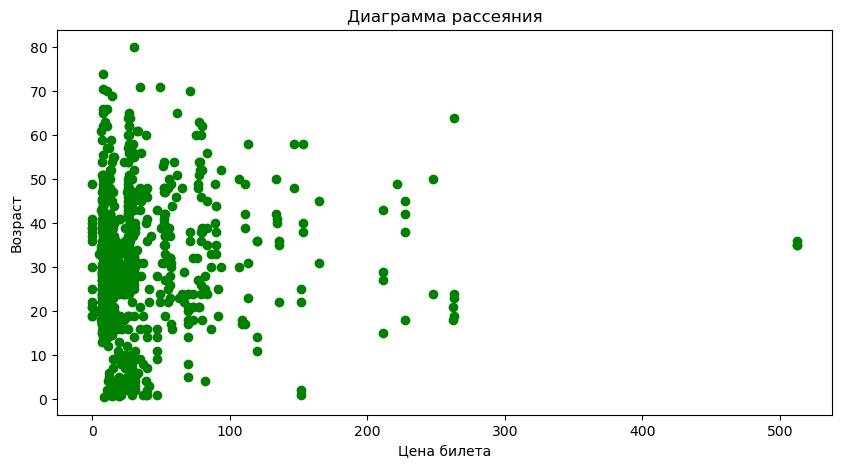

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Fare'], df['Age'], color='green')

plt.title('Диаграмма рассеяния')
plt.xlabel('Цена билета')
plt.ylabel('Возраст')

plt.show()

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [17]:
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(df)

     Survived  Pclass     Sex       Age  Siblings/Spouses Aboard  \
0           0       3    male  0.271174                        1   
1           1       1  female  0.472229                        1   
2           1       3  female  0.321438                        0   
3           1       1  female  0.434531                        1   
4           0       3    male  0.434531                        0   
..        ...     ...     ...       ...                      ...   
882         0       2    male  0.334004                        0   
883         1       1  female  0.233476                        0   
884         0       3  female  0.082684                        1   
885         1       1    male  0.321438                        0   
886         0       3    male  0.396833                        0   

     Parents/Children Aboard      Fare  
0                          0  0.014151  
1                          0  0.139136  
2                          0  0.015469  
3                  

9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

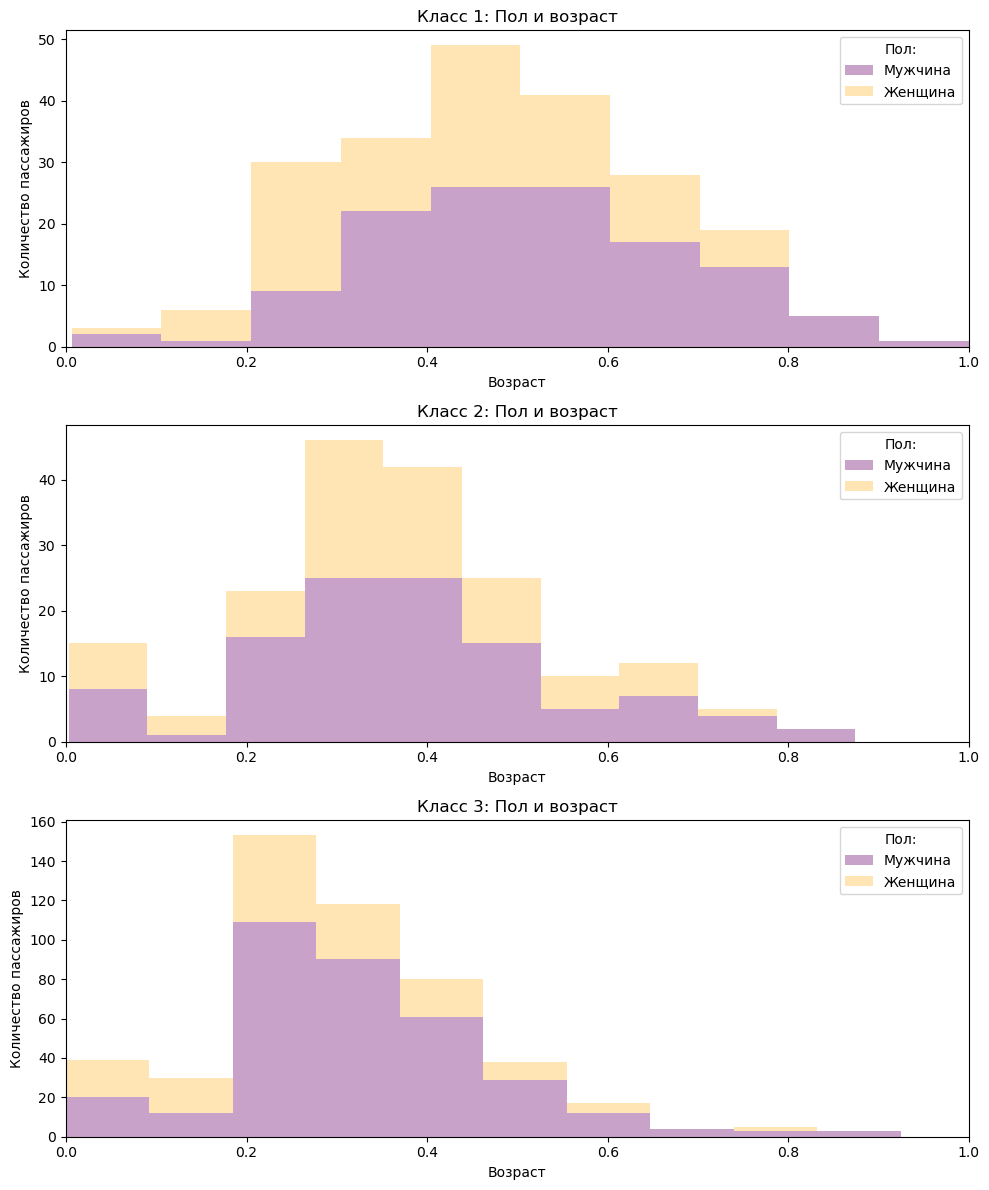

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i in range(1, 4):
    ax = axes[i-1]
    df_class = df[df['Pclass'] == i]
    ax.hist([df_class[df_class['Sex'] == 'male']['Age'], df_class[df_class['Sex'] == 'female']['Age']], bins=10, stacked=True, color=['#c8a2c8', '#FFE5B4'])
    ax.set_title(f'Класс {i}: Пол и возраст')
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Количество пассажиров')
    ax.legend(title='Пол:', labels=['Мужчина', 'Женщина'])
    ax.set_xlim(0, df['Age'].max()) 

plt.tight_layout()
plt.show()

10. Сделайте выводы по работе.

В ходе выполнения лабораторной работы был произведен анализ данных из набора "titanic.csv". Я приобрел опыт работы с этим набором данных, научился загружать необходимые библиотеки, проверять целостность и наличие пропущенных значений в данных. Применял фильтрацию для получения подмножеств данных, создавал гистограммы, различные виды диаграмм для визуализации данных и также осуществлял проверку наличия выбросов. В процессе работы с набором данных я также проводил преобразования столбцов, включая удаление, использование метода кодирования One-Hot Encoding и нормирование значений.